Importing Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

Data collection and Data Analysis

In [60]:
data=pd.read_csv('insurance.csv')

In [61]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [62]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [63]:
data.shape

(1338, 7)

In [64]:
print('No of Rows',data.shape[0])
print('No of Columns',data.shape[1])

No of Rows 1338
No of Columns 7


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [66]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [67]:
# Statistical measures of the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Dell\AppData\Local\Temp\ipykernel_7852\3871923803.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


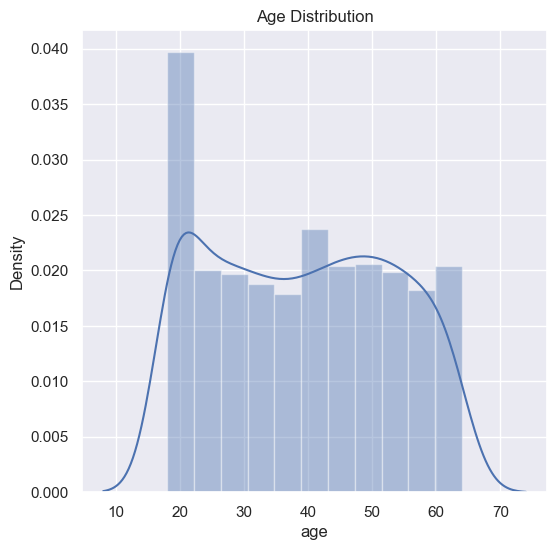

In [68]:
#Distribution of data
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

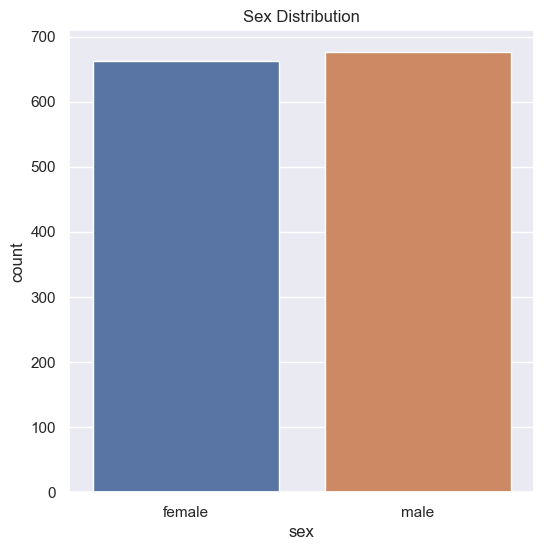

In [69]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=data)
plt.title('Sex Distribution')
plt.show()

In [70]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_7852\728203489.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


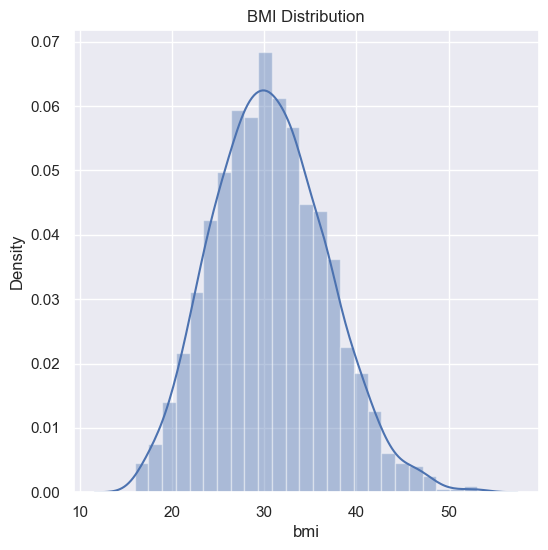

In [71]:
# BMI Distribution
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range-->18.5 to 24.9

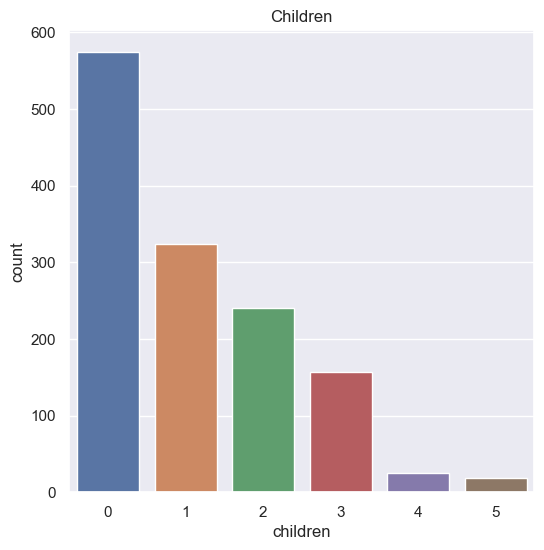

In [72]:
# Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=data)
plt.title('Children')
plt.show()

In [73]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

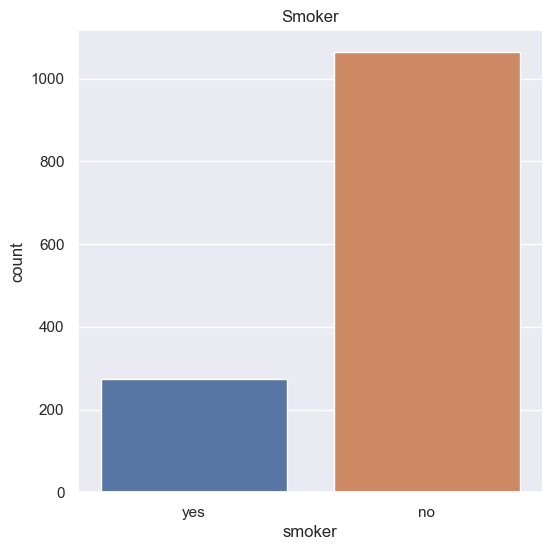

In [74]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=data)
plt.title('Smoker')
plt.show()

In [75]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

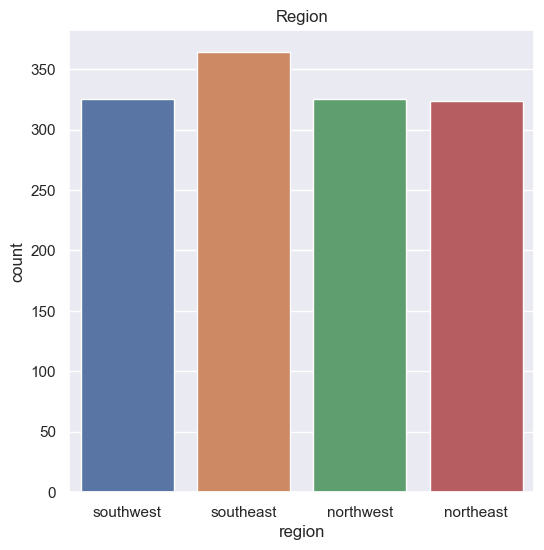

In [76]:
# Regioncolumn
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=data)
plt.title('Region')
plt.show()

In [77]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_7852\76238192.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


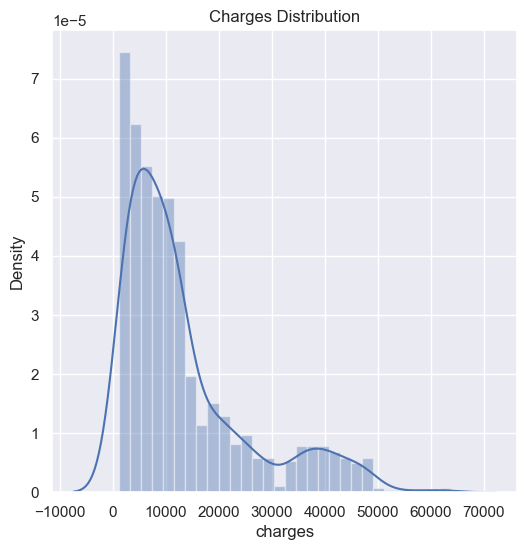

In [78]:
#Distribution of charges
plt.figure(figsize=(6,6))
sns.distplot(data['charges'])
plt.title('Charges Distribution')
plt.show()

<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

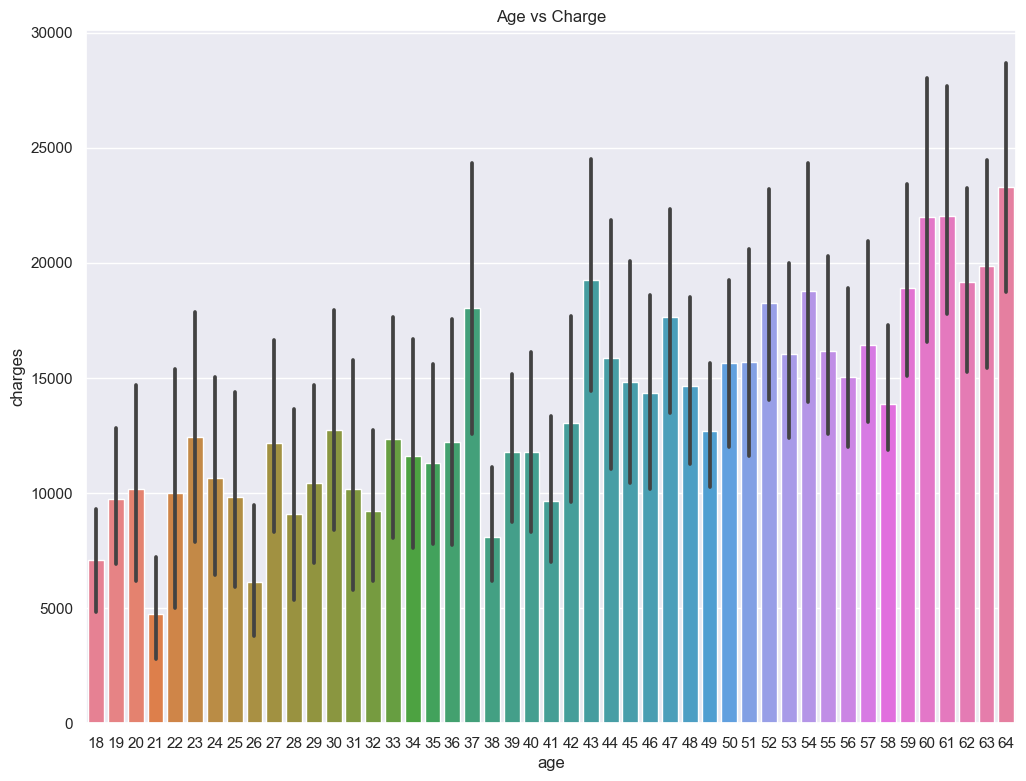

In [79]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data,palette='husl')


<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

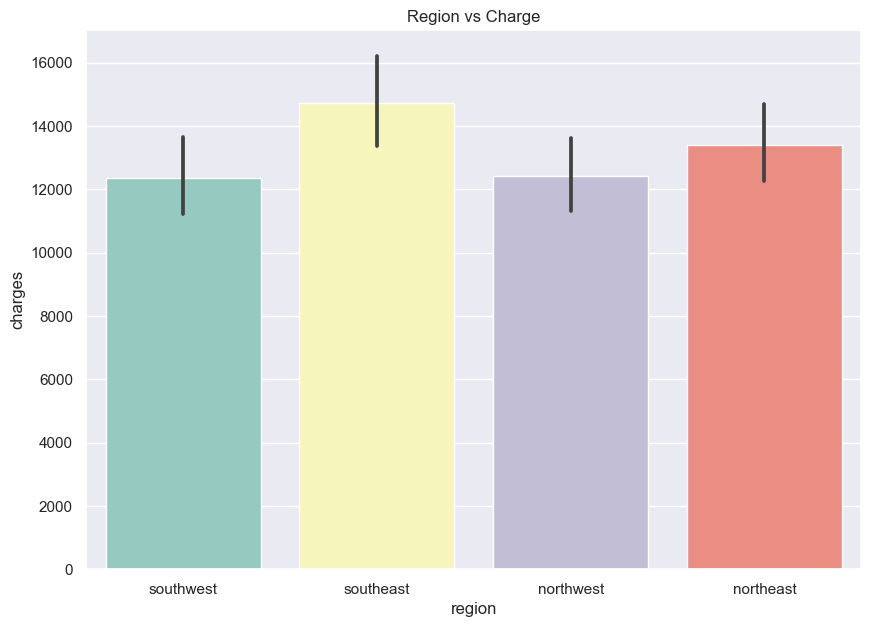

In [80]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data,palette='Set3')


Text(0.5, 1.0, 'BMI VS Charge')

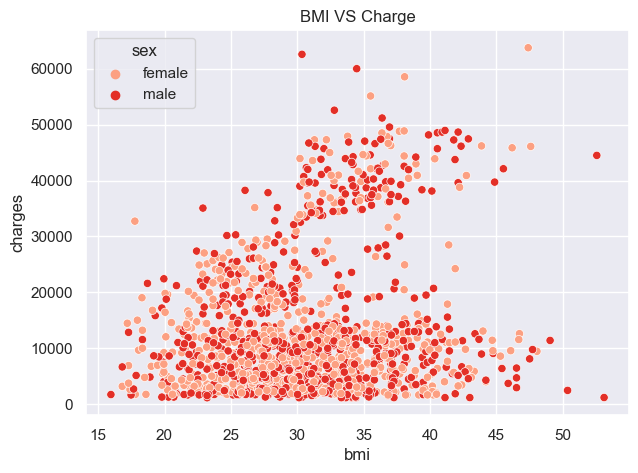

In [81]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data,palette='Reds')
plt.title('BMI VS Charge')


Data Preprocessing

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

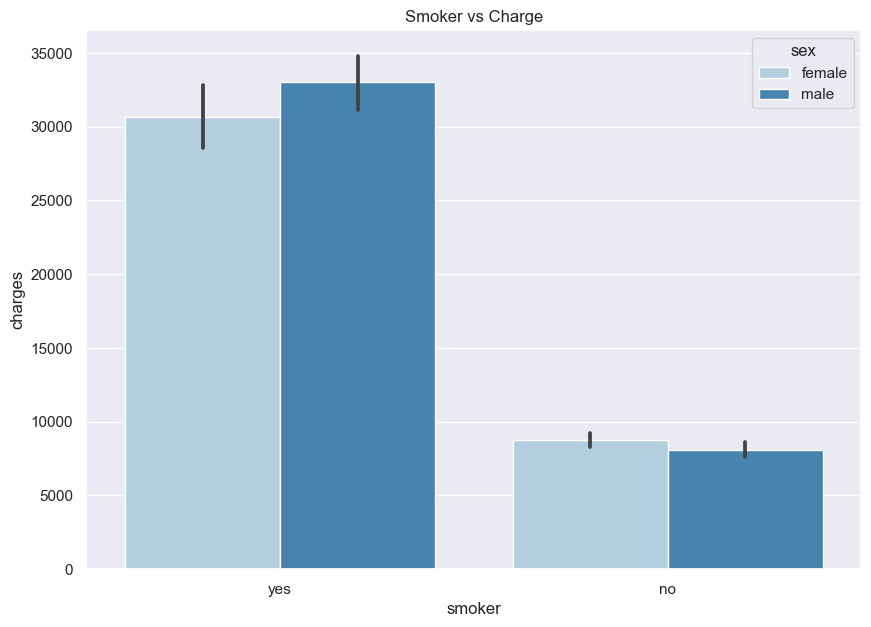

In [82]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data,palette='Blues',hue='sex')


<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

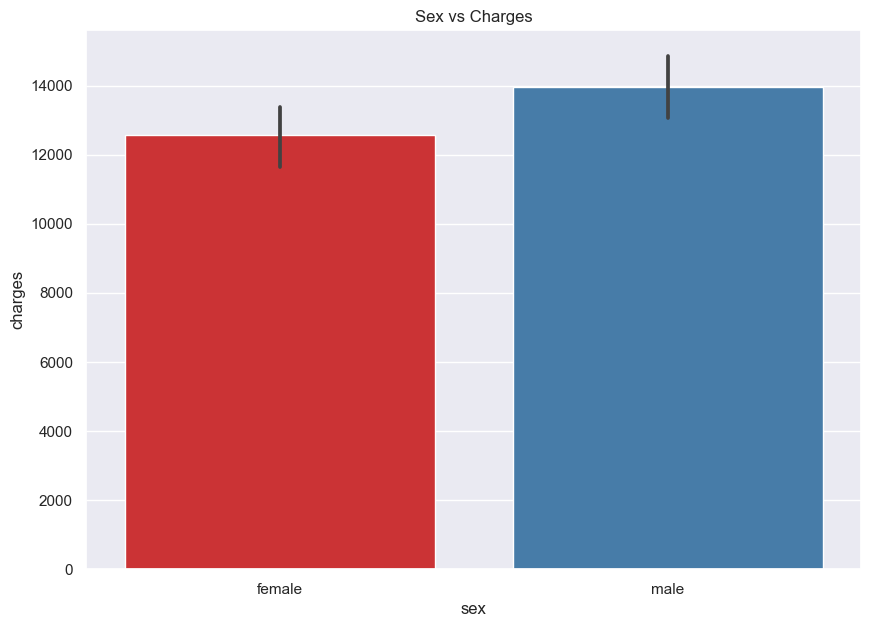

In [83]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data,palette='Set1')


Encoding the categorical features
String to Numerical values

In [84]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [85]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [86]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


# OR

In [87]:
#Encoding the sex column
data.replace({'sex':{'male':0,'female':1}},inplace=True)

In [88]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [89]:
#Encoding smoker column
data.replace({'smoker':{'yes':1,'no':0}},inplace=True)

In [90]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [91]:
#Encoding the region column
data.replace({'region':{'southeast':1,'southwest':2,'northeast':3,'northwest':4}},inplace=True)

In [92]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,4,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,2,2007.94500


Spitting the features and target

In [93]:
X=data.drop(columns='charges',axis=1)
Y=data['charges']

In [94]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       2
1      18    1  33.770         1       0       1
2      28    1  33.000         3       0       1
3      33    1  22.705         0       0       4
4      32    1  28.880         0       0       4
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       4
1334   18    0  31.920         0       0       3
1335   18    0  36.850         0       0       1
1336   21    0  25.800         0       0       2
1337   61    0  29.070         0       1       4

[1338 rows x 6 columns]


In [95]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training and Testing data

In [96]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [97]:
print(X.shape ,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training 

Linear Regression

In [98]:
#Loading the Linear Regression Model
regressor = LinearRegression()

In [99]:
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [100]:
#Prediction on training data
training_data_prediction = regressor.predict(X_train)

In [101]:
#R squared value
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.751505643411174


In [102]:
test_data_prediction = regressor.predict(X_test)

In [103]:
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.7447273869684077


Building a predictive system

In [104]:
input_data = (31,1,25.74,0,1,0)
#changing input_data to a numpy array
input_data_as_numpy_array = np.array(input_data)

#reshape array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD',prediction[0])

[27449.84270016]
The insurance cost is USD 27449.842700164787


G:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

Model Training using fit()method

In [106]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
svm = SVR()
svm.fit(X_train,Y_train)
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [107]:
Y_pred1 = lr.predict(X_test)
Y_pred2 = svm.predict(X_test)
Y_pred3 = rf.predict(X_test)
Y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':Y_test,'Lr':Y_pred1,'svm':Y_pred2,'rf':Y_pred3,'gr':Y_pred4})


In [108]:
df1

,Actual,Lr,svm,rf,gr
17,2395.17155,1520.592422,9194.989367,4261.997086,3997.205442
1091,11286.53870,11570.592018,9380.502862,12790.658152,12159.050017
273,9617.66245,10082.438499,9349.513232,15371.388975,11134.165033
270,1719.43630,2246.217543,9181.832600,2142.656914,3009.267748
874,8891.13950,7881.283620,9307.269629,8685.902116,10056.388319
...,...,...,...,...,...
232,1727.78500,-1669.890650,9189.949867,1779.784564,6619.419081
323,11566.30055,15722.419522,9391.769643,16260.273004,13566.571354
1337,29141.36030,36968.055645,9408.512946,28675.348703,28319.448971
1066,8978.18510,12987.364848,9341.255456,9800.600806,10065.341206


In [109]:
import matplotlib.pyplot as plt

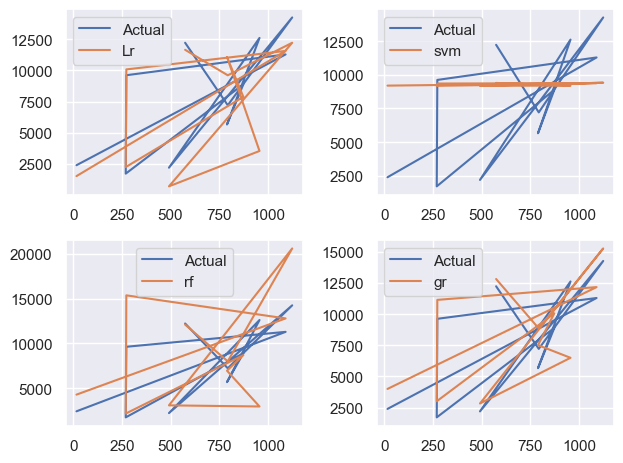

In [110]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label='Lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label='gr')

plt.tight_layout()
plt.legend()

In [111]:
from sklearn import metrics

In [112]:
score1=metrics.r2_score(Y_test,Y_pred1)
score2=metrics.r2_score(Y_test,Y_pred2)
score3=metrics.r2_score(Y_test,Y_pred3)
score4=metrics.r2_score(Y_test,Y_pred4)

In [113]:
print(score1,score2,score3,score4)

0.7447273869684077 -0.08037769618231372 0.8391467117249923 0.8683712229758765


In [114]:
s1 =metrics.mean_absolute_error(Y_test,Y_pred1)
s2 =metrics.mean_absolute_error(Y_test,Y_pred2)
s3 =metrics.mean_absolute_error(Y_test,Y_pred3)
s4 =metrics.mean_absolute_error(Y_test,Y_pred4)

In [115]:
print(s1,s2,s3,s4)

4267.213826730734 8466.951204505302 2686.1710451607464 2377.558752451471


Predict charges for new customer

In [116]:
data = {'age':30,
       'sex':1,
       'bmi':39.30,
       'children':4,
       'smoker':1,
       'region':2}
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,30,1,39.3,4,1,2


In [117]:
new_pred = gr.predict(df)
print(new_pred)

[40500.47165089]
